# I. Introduction

### Pernyataan Masalah (Pendekatan SMART)

**Specific:**  
 - Rumah sakit menghadapi lonjakan pasien dengan keluhan nyeri dada, yang menyebabkan peningkatan beban kerja bagi kardiolog. Tujuan dari proyek ini adalah untuk mengembangkan model prediktif yang dapat menilai kemungkinan penyakit jantung berdasarkan data pasien, sehingga pasien dengan risiko tinggi dapat segera mendapatkan perhatian medis.

**Measurable:**  
 - Model ini harus mencapai **akurasi minimal 85%** dalam memprediksi penyakit jantung menggunakan data historis pasien. Selain itu, model ini harus mampu mengidentifikasi **setidaknya 70% pasien berisiko tinggi** untuk segera mendapatkan konsultasi.

**Achieveable:**  
 - Dengan memanfaatkan **teknik machine learning** dan dataset yang berisi parameter medis yang relevan (misalnya, usia, tekanan darah, kadar kolesterol, hasil EKG), model ini dapat dilatih untuk memberikan prediksi yang akurat. Rekam medis elektronik rumah sakit akan menjadi sumber data utama.

**Relevant:**  
 - Deteksi dini penyakit jantung dapat secara signifikan meningkatkan hasil perawatan pasien dan mengoptimalkan sumber daya rumah sakit. Solusi ini sejalan dengan tujuan rumah sakit untuk **meningkatkan efisiensi dalam perawatan pasien** dan mengurangi konsultasi yang tidak diperlukan bagi kasus berisiko rendah.

**Time-Based:**  
 - Versi awal model ini harus dikembangkan dan diuji dalam waktu **3 bulan**, diikuti dengan periode **evaluasi selama 1 bulan** untuk mengukur dampaknya terhadap efisiensi kardiolog dan prioritas pasien.

**Pernyataan Masalah SMART Final:**  
 - Mengembangkan model prediktif berbasis machine learning dalam waktu **4 bulan** untuk menilai **kemungkinan penyakit jantung** pada pasien dengan keluhan nyeri dada. Model ini harus mencapai **akurasi minimal 85%**, mengidentifikasi **70% kasus berisiko tinggi**, serta mengoptimalkan waktu kardiolog dengan mengurangi konsultasi yang tidak diperlukan.

# II. Modules

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# III. Data Loading

In [164]:
df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/datasets/main/heart-attack-possibility.csv')
df.drop_duplicates(inplace=True)

# IV. Exploratory Data Analysis (EDA)

### Ringkasan Dataset

In [165]:
print("\nInfo Dataset:")
df.info()


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    object 
 11  ca        298 non-null    float64
 12  thal      300 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 35.4+ KB


In [166]:
print("\nStatistik Deskriptif:")
df.describe().T


Statistik Deskriptif:


,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2
ca,298.0,0.674497,0.938202,0.0,0.00,0.0,1.00,3.0


In [167]:
print("\nJumlah Missing Values:")
df.isnull().sum()


Jumlah Missing Values:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

### Visualisasi distribusi fitur numerik

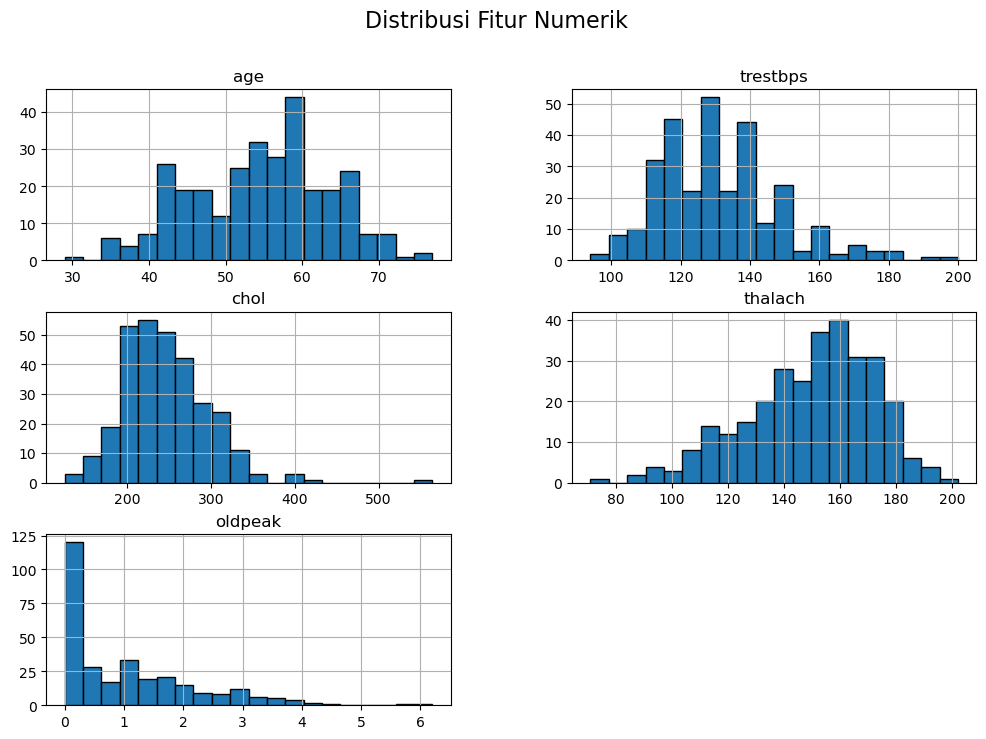

In [168]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.show()

### Distribusi target

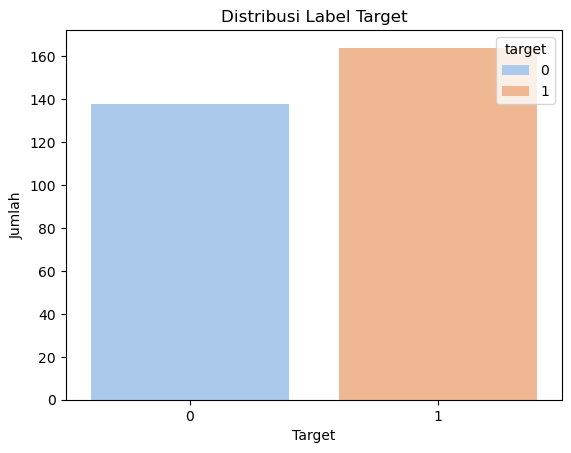

In [169]:
sns.countplot(x=df['target'], palette='pastel', hue=df['target'])
plt.title("Distribusi Label Target")
plt.xlabel("Target")
plt.ylabel("Jumlah")
plt.show()

# V. Feature Engineering

### Drop Missing Value

In [170]:
df.dropna(inplace=True)

### Train and Test Split

In [171]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['target']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=69)

### Define Numrical and Categorical Data

In [173]:
numerical_cols = ['age','trestbps','chol','thalach','oldpeak']
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

### Scaling

In [174]:
scaler = MinMaxScaler()
scaler.fit(X_train[numerical_cols])
X_train_num_scaled = scaler.transform(X_train[numerical_cols])
X_test_num_scaled = scaler.transform(X_test[numerical_cols])

### Encoding

In [175]:
ohe_encoder = OneHotEncoder(sparse_output=False)
ohe_encoder.fit(X_train[categorical_cols])
X_train_cat_encoded = ohe_encoder.transform(X_train[categorical_cols])
X_test_cat_encoded = ohe_encoder.transform(X_test[categorical_cols])

### Concat the Data

In [176]:
X_train_final = np.concatenate((X_train_num_scaled, X_train_cat_encoded), axis=1)
X_test_final = np.concatenate((X_test_num_scaled, X_test_cat_encoded), axis=1)

# VI. Model Definition

In [177]:
model_logreg = LogisticRegression()
model_knn = KNeighborsClassifier(n_neighbors=2)

# VII. Model Training

In [178]:
model_logreg.fit(X_train_final, y_train)
model_knn.fit(X_train_final, y_train)

KNeighborsClassifier(n_neighbors=2)

# VIII. Model Evaluation Logistic Regression

In [179]:
y_pred = model_logreg.predict(X_test_final)

In [180]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.81

Confusion Matrix:
[[40  7]
 [13 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        47
           1       0.86      0.77      0.81        57

    accuracy                           0.81       104
   macro avg       0.81      0.81      0.81       104
weighted avg       0.81      0.81      0.81       104



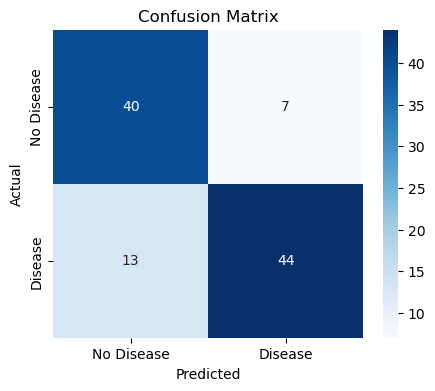

In [181]:
# Visualisasi confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# IX. Model Evaluation KNN

In [182]:
y_pred = model_knn.predict(X_test_final)

In [183]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.79

Confusion Matrix:
[[40  7]
 [15 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.78        47
           1       0.86      0.74      0.79        57

    accuracy                           0.79       104
   macro avg       0.79      0.79      0.79       104
weighted avg       0.80      0.79      0.79       104



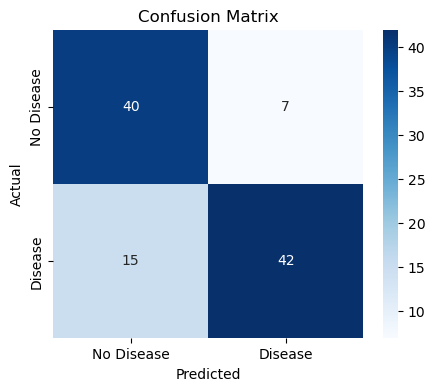

In [184]:
# Visualisasi confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()